<a href="https://colab.research.google.com/github/sebasmos/SolarFlares-Standford/blob/master/SunAnalysis_TensorFlow_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALISIS REGISTRO 20120-2020**  
BASE DE DATOS DE STANDFORD:  http://sid.stanford.edu/database-browser/
POR FECHAS: http://sid.stanford.edu/database-browser/calendar.jsp

**MAY 11TH OF 2020**
1.  Site = AGO
2.  Contact = rok.vogrincic@fmf.uni-lj.si
3.  Country = SLOVENIA
4.  Longitude = 14.53
5.  Latitude = 46.04
6.  UTC_Offset = +01:00
7.  TimeZone = Central European Time (CET)
8.  UTC_StartTime = 2020-05-11 00:00:00
9.  LogInterval = 5
10. LogType = filtered
11. MonitorID = 9190
12. SampleRate = 5
13. StationID = DHO
14. Frequency = 23400
15. UTC_EndTime=2020-05-11 23:59:55
16. DataMin=42.3191142207
17. DataMax=17145.7016985
18. dataquality_average_v0.1=0.024651 
19. dataquality_max_v0.1=1.470409

In [45]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
#Librerias de TF
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

print(tf.__version__)
#Libreries for Espectral analysis
from scipy import signal


2.2.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
df_2020= pd.read_csv('drive/My Drive/Colab Notebooks/StandFordMarch.csv',sep=',')
df_2012 = pd.read_csv('drive/My Drive/Colab Notebooks/StandFord_2012.csv',sep=',')
df = pd.read_csv('drive/My Drive/Colab Notebooks/StandFord_2020.csv',sep=',')
df.head()

,Dates,Signal
0,2020-05-11 00:00:00,8451.370046
1,2020-05-11 00:00:05,8449.143841
2,2020-05-11 00:00:10,8446.917636
3,2020-05-11 00:00:15,8444.691431
4,2020-05-11 00:00:20,8442.465226


Data Extraction


In [0]:
#Read signals
Dates = df[['Dates']].values
Signal = df[['Signal']].values

In [53]:
# Number of samples
print("Muestras totales medidas: ", df['Dates'].nunique())
# Save in M
M = df['Dates'].nunique()

Muestras totales medidas:  14672


In [0]:
# General Statistics of the signal
train_stats = df.describe()
df.describe()
# Set General features of the signal
mean = 6.339291
std = 1.510516

In [55]:
# Save data through dataframe
Dataset = pd.DataFrame(df,columns=['Dates','Signal'])
print(df)

                     Dates       Signal
0      2020-05-11 00:00:00  8451.370046
1      2020-05-11 00:00:05  8449.143841
2      2020-05-11 00:00:10  8446.917636
3      2020-05-11 00:00:15  8444.691431
4      2020-05-11 00:00:20  8442.465226
...                    ...          ...
14667  2020-05-11 20:22:15  5709.362250
14668  2020-05-11 20:22:20  5719.664779
14669  2020-05-11 20:22:25  5729.967309
14670  2020-05-11 20:22:30  5740.269839
14671  2020-05-11 20:22:35  5750.570000

[14672 rows x 2 columns]


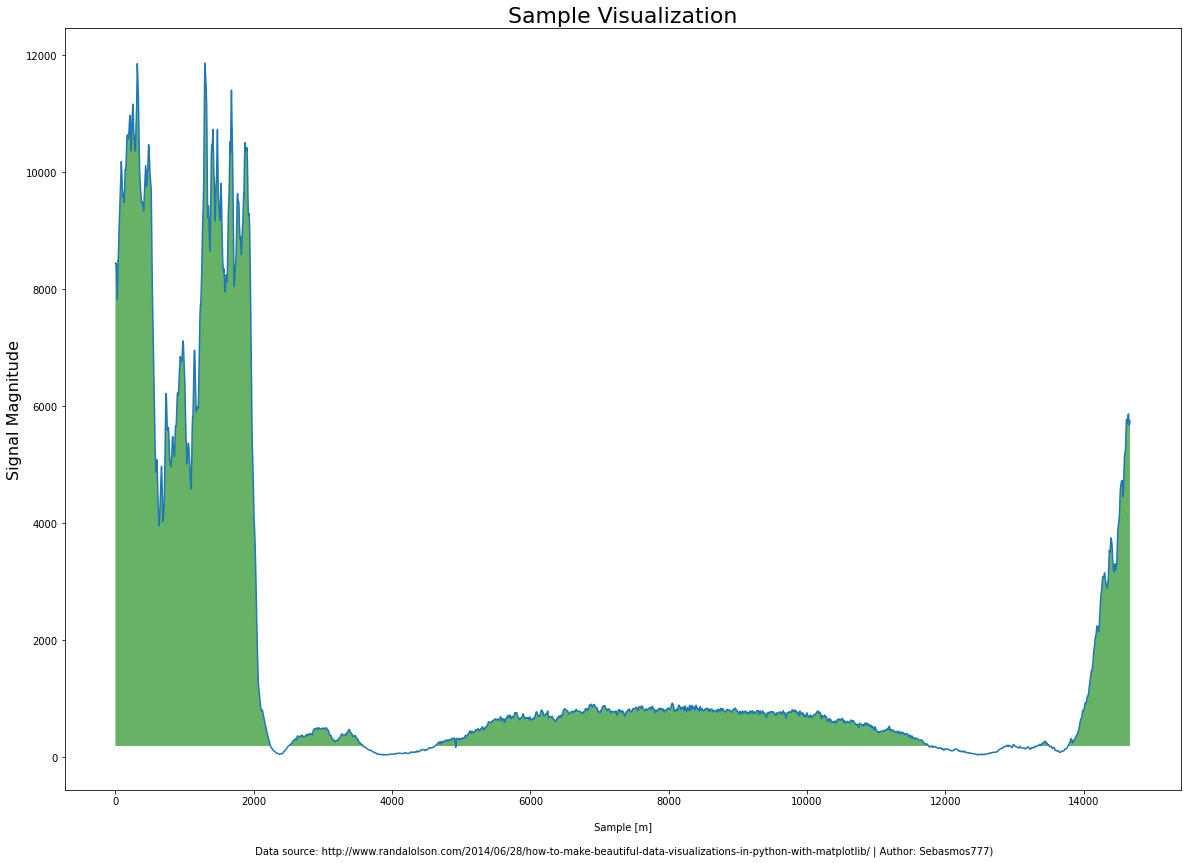

In [56]:
## Save per sample
x = [x for x in range(len(Dates))]

# Signal converted to unidimensional array
Signal = Signal.ravel()
Dates = Dates.ravel() 

plt.figure(figsize=(20, 14)) 
plt.plot(x, Signal, '-') # Reemplazar x por Dates para obtener en terminos fechas

#Add gadgets
plt.ylabel("Signal Magnitude", fontsize=16) 
plt.xlabel("\n Sample [m] \n\n Data source: http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/ | "  
           "Author: Sebasmos777)", fontsize=10)  
# Zoom in for filling
plt.fill_between(x, Signal, 195, where=(Signal > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization",fontsize=22)
plt.show()

In [0]:
#Grafica general en terminos de fechas

plt.figure(figsize=(30,10)) 
plt.subplot(121)
plt.plot(x, Signal, '-') # Reemplazar x por Dates para obtener en terminos fechas
plt.ylabel("Signal Magnitude", fontsize=16) 
plt.xlabel("\n Sample [m] \n\n Data source: http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/ | "  
           "Author: Sebasmos777)", fontsize=10)
plt.grid(True) 
plt.subplot(122)
plt.plot(Dates, Signal, 'r') # Reemplazar x por Dates para obtener en terminos fechas
plt.ylabel("Signal Magnitude", fontsize=16) 
#plt.xlabel("\n Sample [m] \n\n Data source: http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/ | "  
         #  "Author: Sebasmos777)", fontsize=10)
plt.grid(True)
#Add gadgets 
plt.suptitle("Sample vs Date Visualization",fontsize=22)
plt.show()


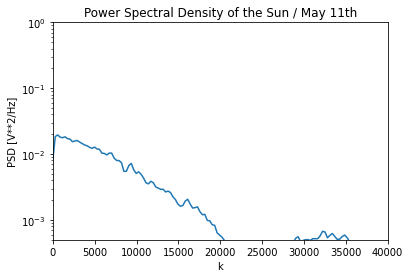

In [23]:
fs=1
f, Pxx_den = signal.welch(Signal, 300000/fs, nperseg=1024)
plt.semilogy(f, np.sqrt(Pxx_den))
plt.ylim([0.5e-3, 1])
plt.xlim([0, 40000])
plt.xlabel('k')
plt.ylabel('PSD [V**2/Hz]')
plt.title('Power Spectral Density of the Sun / May 11th')
plt.show()

Para encontrar los picos utilizar https://plotly.com/python/peak-finding/

Samples to consider within artificial noise model 1440


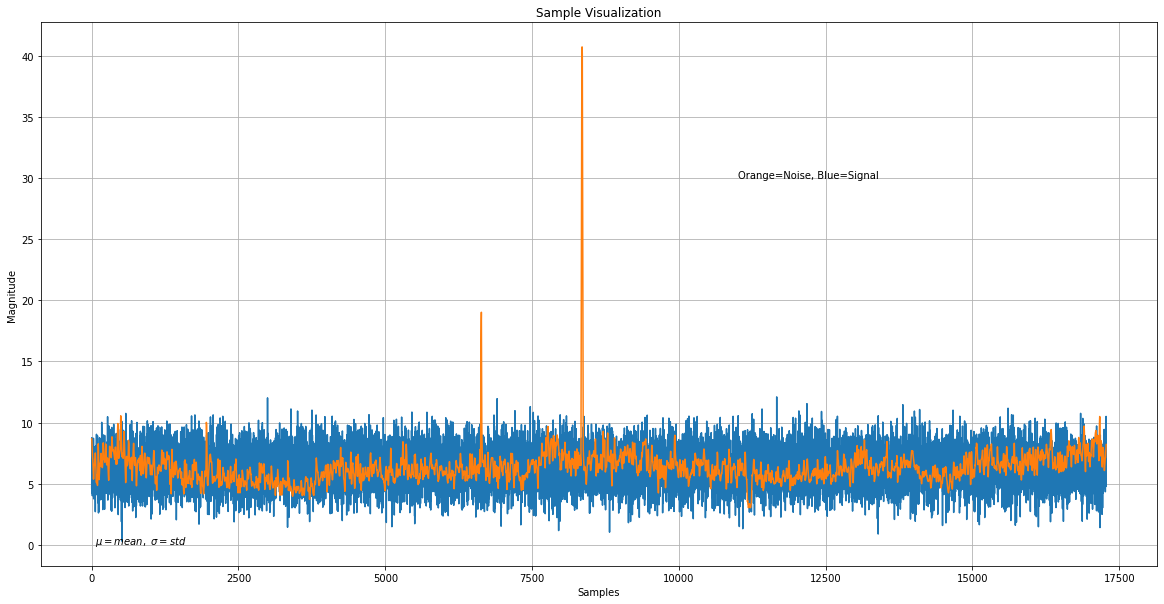

In [0]:
## ANALISIS DE RUIDO ARTIFICIAL EN SENAL SOLAR
print("Samples to consider within artificial noise model {}".format(M))
#Detectar picos
from scipy.signal import find_peaks
# Declaramos espacio de memoria para ruido gausiano
GaussianNoise = []
#Variables a considerar
mu, sigma = mean, std
# Hacemos un analisis muestral vertical.
for i in range(1,M,1):
  ys = mu + std*np.random.randn(17280)
  GaussianNoise.append(ys)
# Visualizar datos
x = [x for x in range(len(ys))]

plt.figure(figsize=(20, 10))
#for k in range(1,M,1):
  #plt.plot(x,GaussianNoise(k))
  
#Se calculan los picos
indices = find_peaks(Signal)
#Se grafica todo
plt.plot(x,ys,'-',x, Signal, '-' )
plt.title("Sample Visualizationhttp://blade1.uniquindio.edu.co/uniquindio/revistainvestigaciones/adjuntos/pdf/8876_103-111.pdf")
plt.ylabel("Magnitude")
plt.xlabel("Samples")
plt.grid(True)
plt.text(60, .025, r'$\mu=mean,\ \sigma=std$')

plt.text(11000, 30, r'Orange=Noise, Blue=Signal')

plt.show()

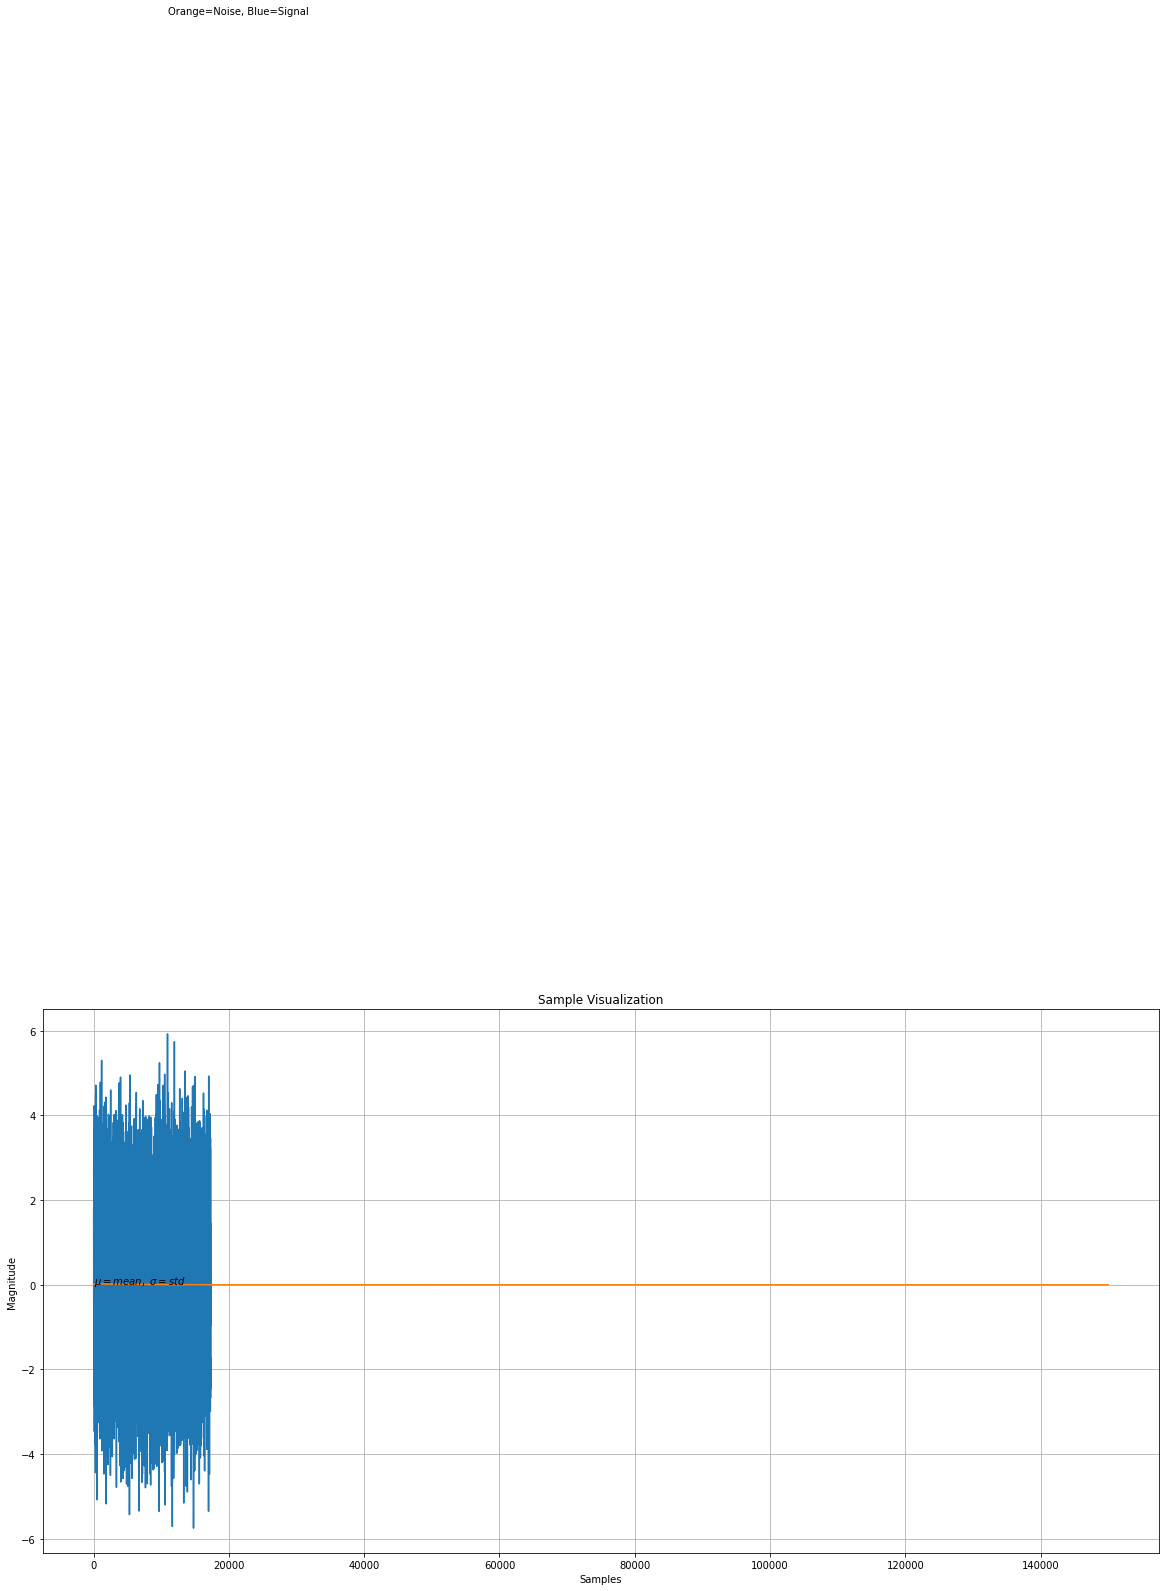

In [39]:
from scipy.signal import find_peaks
import numpy as np

fs=1
f, Pxx_den = signal.welch(Signal, 300000/fs, nperseg=1024)

Mean_Pxx_den = np.mean(Pxx_den)
Std_Pxx_den = np.std(Pxx_den)

GaussianNoise = []
#Variables a considerar
mu, sigma = Mean_Pxx_den, Std_Pxx_den
# Hacemos un analisis muestral vertical.
for i in range(1,M,1):
  ys = mu + std*np.random.randn(17280)
  GaussianNoise.append(ys)

x = [x for x in range(len(ys))]

plt.figure(figsize=(20, 10))
#for k in range(1,M,1):
  #plt.plot(x,GaussianNoise(k))
  
#Se calculan los picos
indices = find_peaks(Signal)
#Se grafica todo
plt.plot(x,ys,'-',f, np.sqrt(Pxx_den), '-' )
plt.title("Sample Visualization")
plt.ylabel("Magnitude")
plt.xlabel("Samples")
plt.grid(True)
plt.text(60, .025, r'$\mu=mean,\ \sigma=std$')

plt.text(11000, 30, r'Orange=Noise, Blue=Signal')
plt.show()

In [0]:
ys

array([5.15729751, 8.11816223, 8.39418048, ..., 8.43601722, 6.33851612,
       4.79471743])

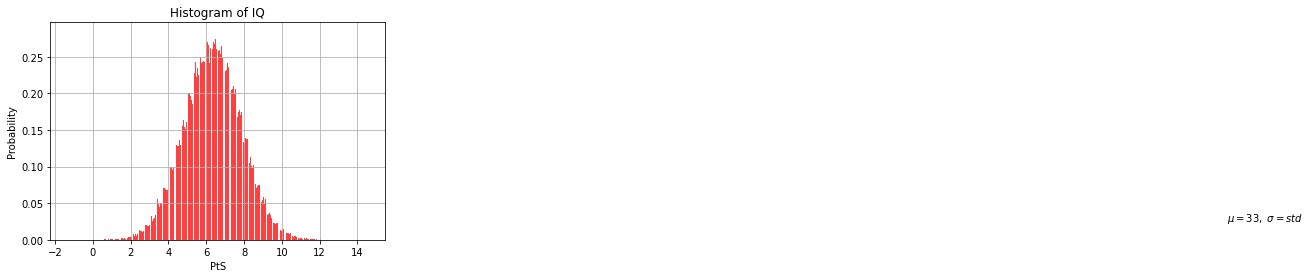

In [0]:
# Analisis de histograma
n, bins, patches = plt.hist(GaussianNoise, 50, density=1, facecolor='red', alpha=0.75)
#plt.figure(figsize=(10,5))
plt.xlabel('PtS')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=33,\ \sigma=std$')
plt.grid(True)
plt.show()



In [0]:
#from scipy import fftpack

#X = fftpack.fft(Signal)

#freqs = fftpack.fftfreq(len(x)) * f_s

#fig, ax = plt.subplots()

#ax.stem(freqs, np.abs(X))
#ax.set_xlabel('Frequency in Hertz [Hz]')
#ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)
  

SOLAR FLARE CLASS X OCTOBER 24TH 2012
Head files (Cols)
1.   Site = AAMON
2.   Longitude = -83.75
3.   Latitude = 42.28
4.   UTC_Offset = 20
5.   TimeZone = Eastern
6.   UTC_StartTime = 2012-10-24 00:00:00
7.   StationID = JJI
8.   Frequency = 22200
9.   MonitorID = 0132
10.  SampleRate = 5
11.  UTC_EndTime=2012-10-24 23:59:55
12.  DataMin=0.0
13.  DataMax=2121284.9421
14.  dataquality_average_v0.1=0.102506 
15.  dataquality_max_v0.1=3.317783



    
 
 



In [0]:
#Read signals
Dates_2012 = df[['Dates']].values
Signal_2012 = df[['Signal']].values